## Regression analysis (Compresive strength concrete)
#### Workspace path : 'C:\\Users\\user\\과제'
#### Dataset name : compresive strength concrete

#### col : 9 , row : 1030

* Target : Concrete compressive strength(MPa, megapascals)

* Key features : All columns are float type.

> Features : 
>1. Cement – quantitative – input variable
>2. Blast Furnace Slag – quantitative – input variable
>3. Fly Ash – quantitative – input variable
>4. Water – quantitative – input variable
>5. Superplasticizer – quantitative – input variable
>6. Coarse Aggregate – quantitative – input variable
>7. Fine Aggregate – quantitative – input variable
>8. Age – quantitative – input variable
>9. Concrete compressive strength – quantitative – **Output Variable**

#### - regression formula
- Concrete compressive strength = const + Cement + Blast Furnace Slag + Fly Ash + Water + Superplasticizer + Coarse Aggregate + Fine Aggregate + Age

* After view summary of linear model, we have to remove some variable that underinfluenced.

### Read and handling data

#### Column names have some additional information. So that to change column name we can handle more easier
* For exmaple, 'Fly Ash' has blank. It can cause trouble.
* So that all the blanks were replaced by underbars.
* Using data_frame.columns, change names

ex) 

```
data = pd.read_csv("example.csv")
data.columns = ['first','second','thrid']
```

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("compresive_strength_concrete.csv")
data.columns = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate',
                'Age', 'Concrete_compressive_strength']

In [2]:
data.shape

(1030, 9)

In [3]:
data.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Check Missing value of data

* Before analysis, It is essential to check missing value of data.
* We can check missing value using isnull module in pandas.

In [4]:
data.isnull().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age                              0
Concrete_compressive_strength    0
dtype: int64

### Data distributions
* Check distribution each columns with histogram

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt 

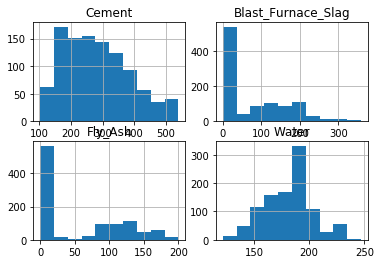

In [6]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.title(data.columns[i])
    data.iloc[:,i].hist()

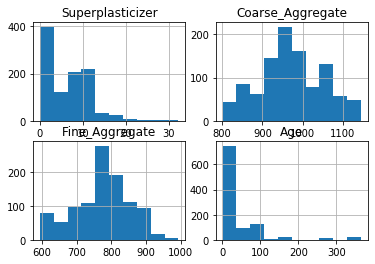

In [7]:
for i in range(4,8):
    plt.subplot(2,2,i-3)
    plt.title(data.columns[i])
    data.iloc[:,i].hist()

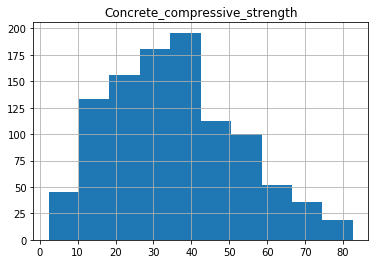

In [8]:
plt.title(data.columns[-1])
data.iloc[:,-1].hist()

### Measure of correlation coefficient
* Using pandas package, we can measure correlation coefficient on data_frame
* Also using seaborn we can print heatmap of correlation coefficient.

In [9]:
data.corr()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast_Furnace_Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly_Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse_Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine_Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


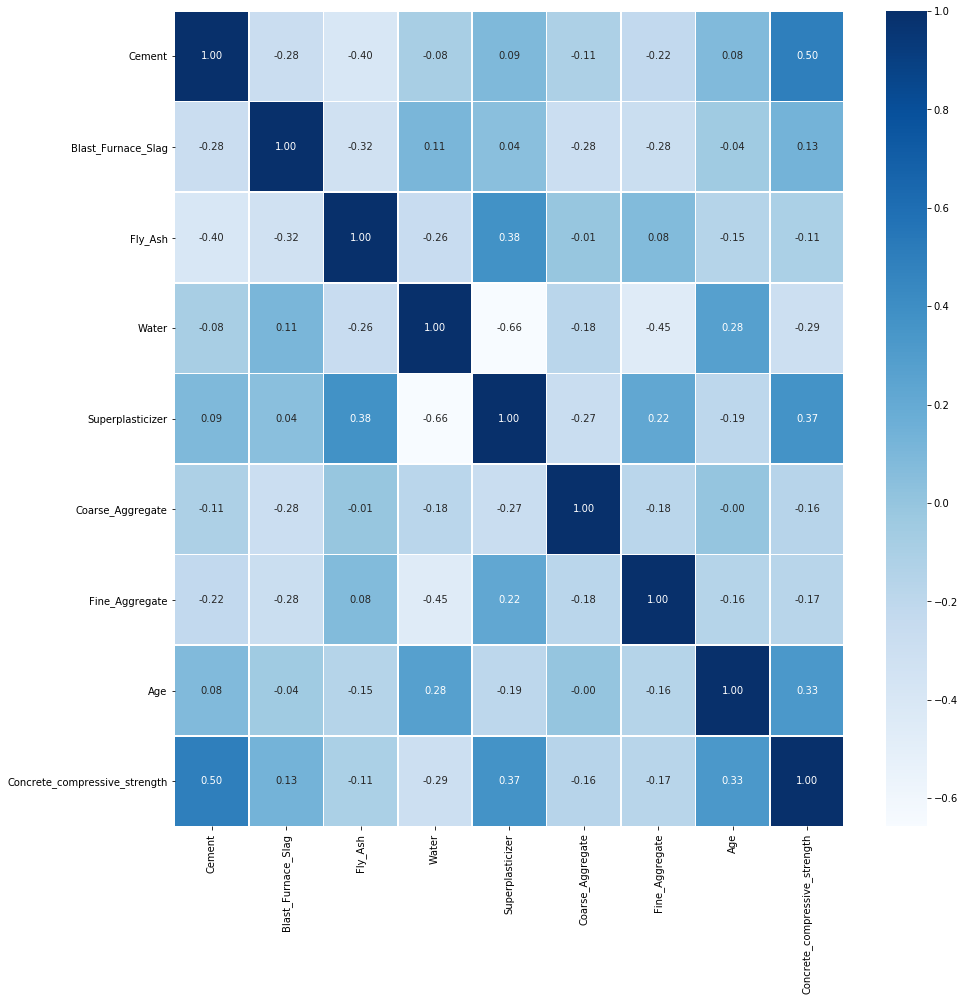

In [10]:
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

#### -> There is no correlation between independent variables -> Multi-collinearity problem resolution
#### -> The closest relationship to dependent variables(Concrete compressive strength) is Cement, Super plasticizer, Age. (0.50, 0.37, 0.33)

### Measure VIF(Variance inflation factor)

* If value of VIF Factor is over than 15, that means variable has Multicollinearity

In [11]:
from patsy import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, x = dmatrices('Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Coarse_Aggregate + Fine_Aggregate + Age',data=data, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1) 

,VIF Factor,features
0,6731.8,Intercept
1,7.5,Cement
2,7.3,Blast_Furnace_Slag
3,6.2,Fly_Ash
4,7.0,Water
5,3.0,Superplasticizer
6,5.1,Coarse_Aggregate
7,7.0,Fine_Aggregate
8,1.1,Age


* The intercept(constant)'s VIF Factor exceeds 15.
* The VIF factor of other variables is not more than 15 and therefore it can be confirmed that there is no multicollinearity.

### Train, Test split

#### Target variable : Concrete compressive strength
#### Independent variable : Cement ~ Fine_Aggregate

* Let x are union of independent and y is target variable

In [12]:
x, y = data.iloc[:,0:-1], data.iloc[:,-1]
print(x.shape, y.shape)

(1030, 8) (1030,)


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=142)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(721, 8) (721,) (309, 8) (309,)


In [14]:
x_train

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28
503,491.0,26.0,123.0,210.0,3.9,882.0,699.0,56
283,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,100
366,214.9,53.8,121.9,155.6,9.6,1014.3,780.6,28
50,332.5,142.5,0.0,228.0,0.0,932.0,594.0,180
...,...,...,...,...,...,...,...,...
653,102.0,153.0,0.0,192.0,0.0,887.0,942.0,90
173,318.8,212.5,0.0,155.7,14.3,852.1,880.4,91
511,424.0,22.0,132.0,178.0,8.5,822.0,750.0,56
411,173.5,50.1,173.5,164.8,6.5,1006.2,793.5,3


In [15]:
x_test

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
304,277.1,0.0,97.4,160.6,11.8,973.9,875.6,3
424,173.5,50.1,173.5,164.8,6.5,1006.2,793.5,14
407,165.0,128.5,132.1,175.1,8.1,1005.8,746.6,3
250,250.0,0.0,95.7,187.4,5.5,956.9,861.2,14
166,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91
...,...,...,...,...,...,...,...,...
921,155.0,0.0,143.0,193.0,9.0,877.0,868.0,28
960,284.0,119.7,0.0,168.3,7.2,970.4,794.2,28
555,181.9,272.8,0.0,185.7,0.0,1012.4,714.3,28
632,325.0,0.0,0.0,184.0,0.0,1063.0,783.0,28


In [16]:
y_train

936    28.63
503    59.59
283    44.21
366    52.20
50     39.78
       ...  
653    25.46
173    68.10
511    65.70
411    23.08
277    36.97
Name: Concrete_compressive_strength, Length: 721, dtype: float64

In [17]:
y_test

304    23.14
424    33.01
407    19.42
250    24.92
166    62.50
       ...  
921     9.74
960    40.93
555    27.94
632    30.57
980    26.92
Name: Concrete_compressive_strength, Length: 309, dtype: float64

### Create model object
#### create linear-regression model and training by model_object.fit(x,y)

In [18]:
from sklearn.linear_model import LinearRegression

m_reg = LinearRegression(fit_intercept = True) #fit_intercept -> beta0 생성 여부

m_reg.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Make constant value
beta0 = m_reg.intercept_

# Make other coefficients of independent variables
beta1 = m_reg.coef_
print('y = {} + {} x1 + {} x2 + {} x3 + {} x4 + {} x5+ {} x6+ {} x7 + {} x8'.format(round(beta0,3),
                                                                                    round(beta1[0],3),
                                                                                    round(beta1[1],3),
                                                                                    round(beta1[2],3),
                                                                                    round(beta1[3],3),
                                                                                    round(beta1[4],3), 
                                                                                    round(beta1[5],3), 
                                                                                    round(beta1[6],3), 
                                                                                    round(beta1[7],3)))

y = -15.588 + 0.116 x1 + 0.095 x2 + 0.082 x3 + -0.147 x4 + 0.354 x5+ 0.015 x6+ 0.016 x7 + 0.105 x8


### Checking another model by numpy calculation

* Coefficient formula is by
![image](https://user-images.githubusercontent.com/56014940/83259451-0585c880-a1f3-11ea-87a8-79236db0727d.png)



* Manually compute to test whether the packages in scikit-learn have the same results


In [20]:
n = len(x_train)

X = np.c_[np.ones(n), x_train]
print('Dimension of array X : {} '.format(X.shape))

XtX = np.matmul(X.T,X)
print('Dimension of array XtX : {} '.format(XtX.shape))

XtX_inv=np.linalg.inv(XtX)
print('Dimension of array XtX_inv: {} '.format(XtX_inv.shape))

beta=np.matmul(np.matmul(XtX_inv, X.T), y_train)

print('y = {} + {} x1 + {} x2 + {} x3 + {} x4 + {} x5 + {} x6 + {} x7 + {} x8'.format(round(beta[0],3),
                                                                                      round(beta[1],3),
                                                                                      round(beta[2],3),
                                                                                      round(beta[3],3),
                                                                                      round(beta[4],3),
                                                                                      round(beta[5],3),
                                                                                      round(beta[6],3),
                                                                                      round(beta[7],3),
                                                                                      round(beta[8],3)))

Dimension of array X : (721, 9) 
Dimension of array XtX : (9, 9) 
Dimension of array XtX_inv: (9, 9) 
y = -15.588 + 0.116 x1 + 0.095 x2 + 0.082 x3 + -0.147 x4 + 0.354 x5 + 0.015 x6 + 0.016 x7 + 0.105 x8


* We can same formula each test.
* The regression model confirmed that there was no abnormality.

### Difference of real data and regression model

* It can measure to difference of real data and regression predict value by plot.
* The darker the color, the more the prediction value overlaps the actual value, and the cloudy color means that the two values ​​are not right.

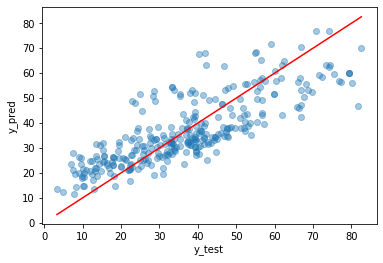

In [21]:
y_predict = m_reg.predict(x_test)
plt.scatter(y_test,y_predict, alpha=0.4)
line = np.linspace(min(y_test.values), max(y_test.values), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

### Measure of model calculate

* mean_squared_error(y_test, y_predict) : **return MSE.** RMSE = sqrt(MSE)
* r2_score(y_test, y_predict) : **return variance of y_pred**
* model.score(x_train, y_train) : **return r2_score of model**

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

In [23]:
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))

MSE : 110.488, RMSE : 10.511


In [24]:
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_predict)))

Variance score : 0.645


In [25]:
print('R2 score : {0:.3f}'.format(m_reg.score(x_train, y_train)))

R2 score : 0.597


### Using Statsmodels.api, it can print summary of linear model

In [26]:
import statsmodels.api as sm 
X1 = sm.add_constant(x_train)
reg = sm.OLS(y_train, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Concrete_compressive_strength   R-squared:                       0.597
Model:                                       OLS   Adj. R-squared:                  0.593
Method:                            Least Squares   F-statistic:                     132.0
Date:                           Mon, 01 Jun 2020   Prob (F-statistic):          3.92e-135
Time:                                   01:14:27   Log-Likelihood:                -2705.6
No. Observations:                            721   AIC:                             5429.
Df Residuals:                                712   BIC:                             5470.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -15.5882     31.879     -0.489      0.625     -78.177      47.001
Cement                 0.1164      0.010     11.645      0.000       0.097       0.136
Blast_Furnace_Slag     0.0954      0.012      7.969      0.000       0.072       0.119
Fly_Ash                0.0816      0.015      5.507      0.000       0.053       0.111
Water                 -0.1467      0.049     -3.019      0.003      -0.242      -0.051
Superplasticizer       0.3544      0.116      3.045      0.002       0.126       0.583
Coarse_Aggregate       0.0152      0.011      1.350      0.178      -0.007       0.037
Fine_Aggregate         0.0155      0.013      1.215      0.225      -0.010       0.041
Age                    0.1054      0.006     16.813      0.000       0.093       0.118
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                2.198
Skew:                          -0.134   Prob(JB):                        0.333
Kurtosis:                       2.959   Cond. No.                     1.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Summary analysis

### model analysis

>R-squared : 0.597 / Adj. R-squared : 0.593

>OLS regression model has 59% explanatory power.

### P-value observation result

> The following variables are p-values of 0.05 or higher, so it is difficult to use them as appropriate variables in the regression equation statistically.

> 1.const (P-value : 0.625)

> 2.Coarse_Aggregate (P-value : 0.178)

> 3.Fine_Aggregate (P-value : 0.225)

**Final linear regression formula is by**

$$ Concrete\;compressive\;strength= 0.11*Cement + 0.09*Blast\,Furnace\,Slag + 0.08*Fly\,Ash  $$ $$- 0.14*Water+ 0.35*Superplasticizer+ 0.11*Age $$

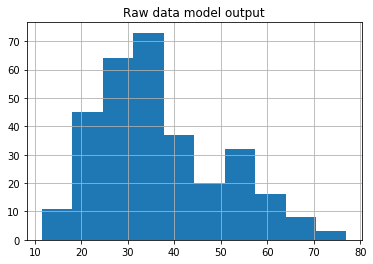

In [60]:
result = pd.Series(y_predict)
plt.title("Raw data model output")
result.hist()

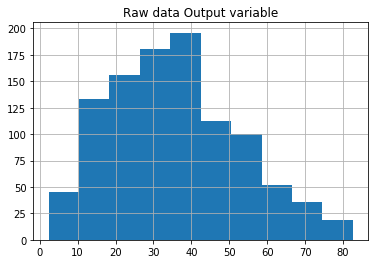

In [59]:
plt.title("Raw data Output variable")
y.hist()

### Addiction analysis(log scale)
* Previous experiments have shown that the model's performance is not good. (R2 score : 0.59)
* Therefore, we try to proceed the experiment through log scaling.

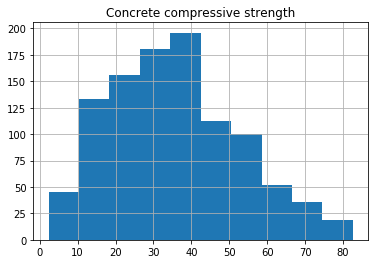

In [27]:
plt.title("Concrete compressive strength")
y.hist()

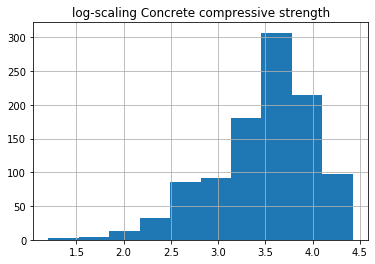

In [28]:
plt.title("log-scaling Concrete compressive strength")
y_log_trans = np.log1p(y)
y_log_trans.hist()

In [29]:
x_log_trans = np.log1p(x)

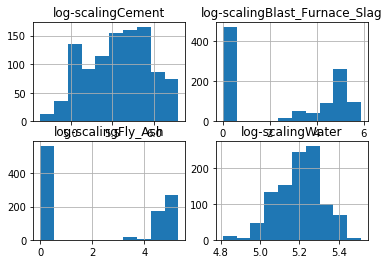

In [30]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.title('log-scaling'+x_log_trans.columns[i])
    x_log_trans.iloc[:,i].hist()

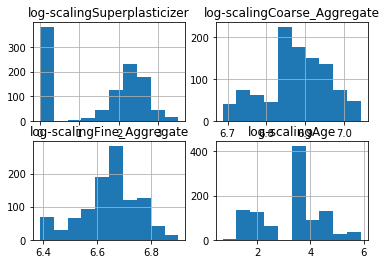

In [31]:
for i in range(4,8):
    plt.subplot(2,2,i-3)
    plt.title('log-scaling'+data.columns[i])
    x_log_trans.iloc[:,i].hist()

In [32]:
from sklearn.model_selection import train_test_split

log_x_train, log_x_test, log_y_train, log_y_test = train_test_split(x_log_trans, y_log_trans, train_size=0.7, test_size=0.3, random_state=142)

from sklearn.linear_model import LinearRegression

log_m_reg = LinearRegression(fit_intercept = True) #fit_intercept -> beta0 생성 여부

log_m_reg.fit(log_x_train, log_y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# Make constant value
beta0 = log_m_reg.intercept_

# Make other coefficients of independent variables
beta1 = log_m_reg.coef_
print('y = {} + {} x1 + {} x2 + {} x3 + {} x4 + {} x5+ {} x6+ {} x7 + {} x8'.format(round(beta0,3),
                                                                                    round(beta1[0],3),
                                                                                    round(beta1[1],3),
                                                                                    round(beta1[2],3),
                                                                                    round(beta1[3],3),
                                                                                    round(beta1[4],3), 
                                                                                    round(beta1[5],3), 
                                                                                    round(beta1[6],3), 
                                                                                    round(beta1[7],3)))

y = 6.05 + 0.772 x1 + 0.068 x2 + 0.027 x3 + -1.134 x4 + 0.059 x5+ -0.009 x6+ -0.327 x7 + 0.295 x8


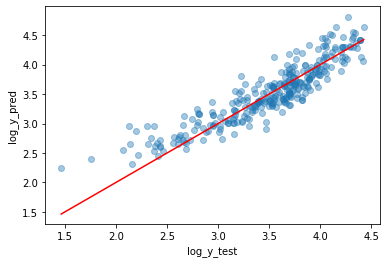

In [34]:
log_y_predict = log_m_reg.predict(log_x_test)
plt.scatter(log_y_test,log_y_predict, alpha=0.4)
line = np.linspace(min(log_y_test.values), max(log_y_test.values), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('log_y_test')
plt.ylabel('log_y_pred')
plt.show()

* It can be seen that residual a lot diminishes.

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
log_mse = mean_squared_error(log_y_test, log_y_predict)
log_rmse = np.sqrt(log_mse)

In [36]:
print('log_MSE : {0:.3f}, log_RMSE : {1:.3f}'.format(log_mse,log_rmse))
print('log_Variance score : {0:.3f}'.format(r2_score(log_y_test,log_y_predict)))
print('log_R2 score : {0:.3f}'.format(log_m_reg.score(log_x_train, log_y_train)))

log_MSE : 0.053, log_RMSE : 0.231
log_Variance score : 0.820
log_R2 score : 0.785


#### - Overall, the performance of the model, such as MSE and RMSE, has risen significantly.

In [37]:
import statsmodels.api as sm 
X1 = sm.add_constant(log_x_train)
reg = sm.OLS(log_y_train, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Concrete_compressive_strength   R-squared:                       0.785
Model:                                       OLS   Adj. R-squared:                  0.783
Method:                            Least Squares   F-statistic:                     325.2
Date:                           Mon, 01 Jun 2020   Prob (F-statistic):          6.91e-232
Time:                                   01:14:28   Log-Likelihood:                 6.0964
No. Observations:                            721   AIC:                             5.807
Df Residuals:                                712   BIC:                             47.03
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.0502      2.845      2.126      0.034       0.464      11.636
Cement                 0.7724      0.039     19.845      0.000       0.696       0.849
Blast_Furnace_Slag     0.0683      0.006     10.636      0.000       0.056       0.081
Fly_Ash                0.0270      0.007      4.105      0.000       0.014       0.040
Water                 -1.1343      0.152     -7.454      0.000      -1.433      -0.836
Superplasticizer       0.0585      0.015      4.000      0.000       0.030       0.087
Coarse_Aggregate      -0.0088      0.184     -0.048      0.962      -0.371       0.353
Fine_Aggregate        -0.3273      0.147     -2.233      0.026      -0.615      -0.040
Age                    0.2946      0.008     35.573      0.000       0.278       0.311
==============================================================================
Omnibus:                       45.677   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.796
Skew:                          -0.572   Prob(JB):                     4.64e-13
Kurtosis:                       3.764   Cond. No.                     4.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Summary analysis(log-scaling)

### model analysis

>R-squared : 0.785 / Adj. R-squared : 0.783

>OLS regression model has 78% explanatory power.

### => Before R-squared : 0.59, Log-scale R-squared : 0.785
### => About 20% performance increase

### P-value observation result

> The following variables are p-values of 0.05 or higher, so it is difficult to use them as appropriate variables in the regression equation statistically.

> 1.Coarse_Aggregate (P-value : 0.962)

### => We can observe that the p-value of the variables is stabilized overall.

### Final linear regression formula is by

$$ Concrete\;compressive\;strength= 6.05+ 0.77*Cement + 0.06*Blast\,Furnace\,Slag + 0.02*Fly\,Ash  $$ $$- 1.13*Water+ 0.05*Superplasticizer- 0.32*Fine\,Aggregate+ 0.29*Age $$

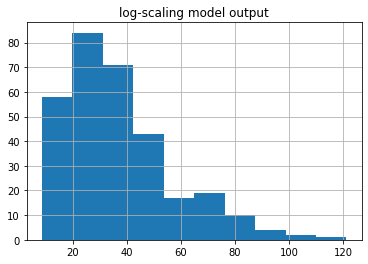

In [52]:
# expm1 = exp(x)-1
# By expm1 function, we can get origin value before using log-scale
result = np.expm1(log_y_predict)
result = pd.Series(result)
plt.title("log-scaling model output")
result.hist()

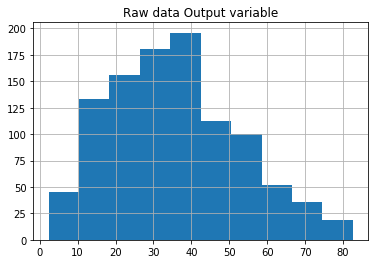

In [53]:
plt.title("Raw data Output variable")
y.hist()

### Addiction analysis(Standscale scale)
* Previous experiments have shown that the model's performance is not good.
* Therefore, we try to proceed the experiment through log scaling.

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_standard = pd.DataFrame(x_scaled)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EB5A62288>,
      dtype=object)

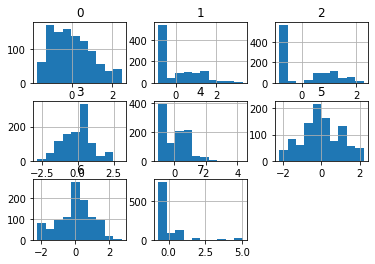

In [41]:
x_standard.hist()

In [42]:
type(y)

pandas.core.series.Series

In [43]:
y_reshape = y.to_numpy()
y_reshape = y_reshape.reshape(-1,1)

In [44]:
scaler = StandardScaler()
scaler.fit(y_reshape)
y_scaled = scaler.transform(y_reshape)
y_standard = pd.DataFrame(y_scaled)

In [45]:
from sklearn.model_selection import train_test_split

stand_x_train, stand_x_test, stand_y_train, stand_y_test = train_test_split(x_standard, y_standard,
                                                                            train_size=0.7, test_size=0.3, random_state=142)

from sklearn.linear_model import LinearRegression

stand_m_reg = LinearRegression(fit_intercept = True) #fit_intercept -> beta0 생성 여부

stand_m_reg.fit(stand_x_train, stand_y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# Make constant value
beta0 = stand_m_reg.intercept_

# Make other coefficients of independent variables
beta1 = stand_m_reg.coef_
print('y = {} + {} x1 + {} x2 + {} x3 + {} x4 + {} x5+ {} x6+ {} x7 + {} x8'.format(round(beta0[0],3),
                                                                                    round(beta1[0][0],3),
                                                                                    round(beta1[0][1],3),
                                                                                    round(beta1[0][2],3),
                                                                                    round(beta1[0][3],3),
                                                                                    round(beta1[0][4],3), 
                                                                                    round(beta1[0][5],3), 
                                                                                    round(beta1[0][6],3), 
                                                                                    round(beta1[0][7],3)))

y = -0.001 + 0.728 x1 + 0.493 x2 + 0.313 x3 + -0.187 x4 + 0.127 x5+ 0.071 x6+ 0.075 x7 + 0.399 x8


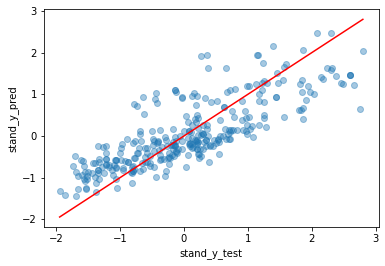

In [47]:
stand_y_predict = stand_m_reg.predict(stand_x_test)
plt.scatter(stand_y_test,stand_y_predict, alpha=0.4)
line = np.linspace(min(stand_y_test.values), max(stand_y_test.values), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('stand_y_test')
plt.ylabel('stand_y_pred')
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
stand_mse = mean_squared_error(stand_y_test, stand_y_predict)
stand_rmse = np.sqrt(stand_mse)

In [49]:
print('stand_MSE : {0:.3f}, stand_RMSE : {1:.3f}'.format(stand_mse,stand_rmse))
print('stand_Variance score : {0:.3f}'.format(r2_score(stand_y_test,stand_y_predict)))
print('stand_R2 score : {0:.3f}'.format(stand_m_reg.score(stand_x_train, stand_y_train)))

stand_MSE : 0.396, stand_RMSE : 0.630
stand_Variance score : 0.645
stand_R2 score : 0.597


In [50]:
import statsmodels.api as sm 
X1 = sm.add_constant(stand_x_train)
reg = sm.OLS(stand_y_train, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     132.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          3.92e-135
Time:                        01:14:29   Log-Likelihood:                -675.78
No. Observations:                 721   AIC:                             1370.
Df Residuals:                     712   BIC:                             1411.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.023     -0.058      0.954      -0.047       0.044
0              0.7284      0.063     11.645      0.000       0.606       0.851
1              0.4929      0.062      7.969      0.000       0.371       0.614
2              0.3126      0.057      5.507      0.000       0.201       0.424
3             -0.1875      0.062     -3.019      0.003      -0.309      -0.066
4              0.1267      0.042      3.045      0.002       0.045       0.208
5              0.0707      0.052      1.350      0.178      -0.032       0.173
6              0.0746      0.061      1.215      0.225      -0.046       0.195
7              0.3985      0.024     16.813      0.000       0.352       0.445
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                2.198
Skew:                          -0.134   Prob(JB):                        0.333
Kurtosis:                       2.959   Cond. No.                         8.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Standard sclae is not good performance than log scale